# TAREFA DATASET GRUPO

Para esta fase, decidimos escolher um dataset referente a avaliações de vinhos. 
Pode ser encontrado neste link: https://www.kaggle.com/datasets/zynicide/wine-reviews <br>
O objetivo desta fase é, através deste dataset, inferir acerca do valor de points que será dado a um dado vinho.

### **1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [1]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('always')

### **2. Carregar o dataset para um dataframe da biblioteca Panda**

In [2]:
df = pd.read_csv('docs/winemag-data-130k-v2.csv', encoding="utf-8", skipinitialspace=True)

### **3. Obtenção de informação acerca do dataset: tipos de dados das features, conteúdo do dataset e estatística**

* **tipos de dados das features**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


A feature objetivo, points, está preenchida em todas as linhas.<br>
Muitas das outras features têm de ser preenchidas mais tarde ou retiradas completamente por estarem incompletas (como taster_twiter_handle)

* **conteúdo do dataset**

In [4]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Reparamos que a feature Unnamed: 0 apenas serve como id, sendo portanto desnecessária. <br>
Region 1 e 2 sao apenas especificações de province, dependendo do seu número de valores únicos, talvez sejam um overload de informação que é melhor excluir. <br>
Da mesma forma, taster_twitter_handle apenas complementa taster_name.

* **estatística**

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Podemos ver que embora points seja da perspetiva de fora um atributo de classificação que iria de 0-100, neste dataset apenas temos valores entre 80 e 100.<br>
O valor máximo de preço é muito superior à sua média (possível necessidade de tratar de outliers).


* **Distribuição da feature target**

<AxesSubplot:>

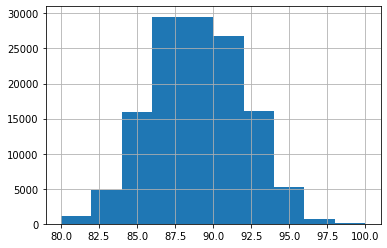

In [6]:
df.points.hist()

Distribuição do target é aproximadamente normal, o que será benéfico para a criação de modelos, como por exemplo de regressão linear.

* **Distribuição da feature price**

<AxesSubplot:>

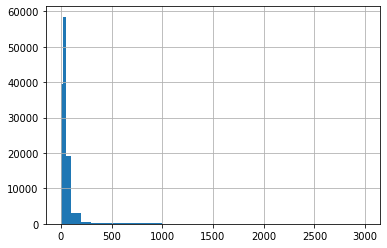

In [7]:
df.price.hist(bins=[0,20,50,100,200,300,1000,2000,2500,3000])

Através do grafo dos preços (possível segunda feature alvo), podemos ver que a grande maioria destes se distribui por volta de valores menores que 100.

* **Análise dos valores únicos das features**

In [8]:
for c in df:
    print(f"{c}: {df[c].unique()}")
    print(f"Quantidade: {df[c].nunique()}")
    print("---------------------------------------")

Unnamed: 0: [     0      1      2 ... 129968 129969 129970]
Quantidade: 129971
---------------------------------------
country: ['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt']
Quantidade: 43
---------------------------------------
description: ["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  alre

| Feature               | Justificação                                                                                                                                          |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unnamed               | Como mencionado anteriormente, esta feature serve como id, devendo ser retirada.                                                                      |
| description           | O número de valores únicos é muito elevado, além de serem strings sem nenhum significado para os modelos                                              |
| designation           | Número de valores únicos muito elevados (para strings).                                                                                               |
| province              | Embora uma especificação de country, como não tem um número excessivo de valores únicos, pode ser benéfico.                                           |
| region_1              | Especificação de especificação (province), com muitos valores únicos. Provavelmente melhor retirar.                                                   |
| region_2              | Nova especificação de province.                                                                                                                       |
| taster_twitter_handle | Especificação/AlterEgo do taster_name, informação redundante.                                                                                         |
| title                 | Como mencionado anteriormente, número de únicos demasiado elevado, mas contém informação útil dentro deste, devendo ser retirada nos próximos passos. |
| variety               | Número elevado de strings únicas, pode ou não ser relevante, devendo ser experimentado o modelo em ambos os casos.                                    |
| winery                | Número muito elevado de strings únicas, embora potencialmente relevantes numa perspetiva de mundo real.                                               |

### **4. Preparação dos dados**

In [9]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

* **Remoção de features**

In [11]:
remove_features_list = ["Unnamed: 0",'designation', "description",'region_1', "region_2", "taster_twitter_handle","winery"]
for ft in remove_features_list:
    df = df.drop(ft, axis=1)

* **Preenchimento valores em falta**

In [12]:
df.price.fillna(df.price.mean(),inplace =True)
df.country.fillna(str(df.country.mode()),inplace =True)
df.province.fillna(str(df.province.mode()),inplace =True)
df.taster_name.fillna('unknown',inplace =True)
df.variety.fillna(str(df.variety.mode()),inplace =True)

* **Tratamento de title**

Obsevando previamente os valores da feature title, observamos que todos parecem incluir o ano de produção de vinho e, embora a atualmente esta feature apresente demasiados valores únicos para ser útil, se conseguirmos retirar apenas o ano desta, possívelmente poderá ser usado no modelo.

In [13]:
df[df.title.str.contains(r'.*\d{4}.*')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125362 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      125362 non-null  object 
 1   points       125362 non-null  int64  
 2   price        125362 non-null  float64
 3   province     125362 non-null  object 
 4   taster_name  125362 non-null  object 
 5   title        125362 non-null  object 
 6   variety      125362 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.7+ MB


Confirmamos que a grande maioria das linhas apresenta o ano. (apenas 4609 de 130k não apresentam)

In [14]:
df.title = df.title.str.replace(r'(.|\n)*(\d{4})(.|\n)*',r'\2',regex=True)
df.title = df.title[df.title.str.contains(r'\d{4}')]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129971 non-null  object 
 1   points       129971 non-null  int64  
 2   price        129971 non-null  float64
 3   province     129971 non-null  object 
 4   taster_name  129971 non-null  object 
 5   title        125362 non-null  object 
 6   variety      129971 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


Mudar nome da feature para year

In [16]:
rename_map = {'title':'year'}
df.rename(columns=rename_map,inplace=True)

In [17]:
df

,country,points,price,province,taster_name,year,variety
0,Italy,87,35.363389,Sicily & Sardinia,Kerin O’Keefe,2013,White Blend
1,Portugal,87,15.000000,Douro,Roger Voss,2011,Portuguese Red
2,US,87,14.000000,Oregon,Paul Gregutt,2013,Pinot Gris
3,US,87,13.000000,Michigan,Alexander Peartree,2013,Riesling
4,US,87,65.000000,Oregon,Paul Gregutt,2012,Pinot Noir
...,...,...,...,...,...,...,...
129966,Germany,90,28.000000,Mosel,Anna Lee C. Iijima,2013,Riesling
129967,US,90,75.000000,Oregon,Paul Gregutt,2004,Pinot Noir
129968,France,90,30.000000,Alsace,Roger Voss,2013,Gewürztraminer
129969,France,90,32.000000,Alsace,Roger Voss,2012,Pinot Gris


Preencher valores nulos com a moda

In [18]:
df.year.fillna(df.year.mode().astype(int).values[0],inplace=True)

In [19]:
df.year = df.year.astype(int)

* **Remoção de duplicados**

In [20]:
# Remoção de registos duplicados (caso hajam)
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97886 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97886 non-null  object 
 1   points       97886 non-null  int64  
 2   price        97886 non-null  float64
 3   province     97886 non-null  object 
 4   taster_name  97886 non-null  object 
 5   year         97886 non-null  int32  
 6   variety      97886 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 5.6+ MB


* **Labeling das features**

Número de valores únicos e tipo de cada feature

In [22]:
columns = df.columns.values
for c in columns:
    print(f"{c} : {df[c].nunique()}  \n   type : {df[c].dtype}")

country : 44  
   type : object
points : 21  
   type : int64
price : 391  
   type : float64
province : 426  
   type : object
taster_name : 20  
   type : object
year : 168  
   type : int32
variety : 708  
   type : object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97886 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97886 non-null  object 
 1   points       97886 non-null  int64  
 2   price        97886 non-null  float64
 3   province     97886 non-null  object 
 4   taster_name  97886 non-null  object 
 5   year         97886 non-null  int32  
 6   variety      97886 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 5.6+ MB


Labeling de features tipo object

In [24]:
for c in df.columns.values:
    if(df[c].dtype=='object'):
        print(c)
        labels = df[c].astype('category').cat.categories.tolist()
        replace_map_comp = {c : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        df.replace(replace_map_comp,inplace=True)

df.head()


country
province
taster_name
variety


,country,points,price,province,taster_name,year,variety
0,24,87,35.363389,333,10,2013,692
1,33,87,15.000000,110,16,2011,452
2,42,87,14.000000,270,15,2013,438
3,42,87,13.000000,220,1,2013,481
4,42,87,65.000000,270,15,2012,442


### **5. Aplicação de modelos de Machine Learning**

#### **5.1. Decision Tree regressor**

* **Imports necessários**

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

* **Retirar target do data-set de treino e criar uma cópia do data-set, para verificar predictions**

In [26]:
x = df.drop(['points'],axis=1)
y = df['points'].to_frame()

In [27]:
x

,country,price,province,taster_name,year,variety
0,24,35.363389,333,10,2013,692
1,33,15.000000,110,16,2011,452
2,42,14.000000,270,15,2013,438
3,42,13.000000,220,1,2013,481
4,42,65.000000,270,15,2012,442
...,...,...,...,...,...,...
129965,17,28.000000,13,16,2013,438
129966,19,28.000000,234,2,2013,481
129968,17,30.000000,13,16,2013,211
129969,17,32.000000,13,16,2012,438


In [28]:
y

,points
0,87
1,87
2,87
3,87
4,87
...,...
129965,90
129966,90
129968,90
129969,90


* **Separar o data-set em conjuntos de treino e teste** <br>
Tamanho de teste - 25% <br>
Seed = 2022

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2022)

* **Criar modelo de árvores de decisão**

In [30]:
clf = DecisionTreeRegressor(random_state=2022)

* **Treinar modelo**

In [31]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(random_state=2022)

Gerar previsões

In [32]:
predictions = clf.predict(x_test)
pd.DataFrame(predictions)

,0
0,89.000000
1,92.000000
2,92.000000
3,86.000000
4,89.000000
...,...
24467,94.000000
24468,89.000000
24469,89.833333
24470,92.000000


MAE

In [33]:
mean_absolute_error(y_test,predictions)

2.3696542026541616

In [34]:
y_test

,points
105320,87
100128,90
1139,84
40948,86
110663,90
...,...
68269,90
82958,86
87230,85
10249,91


#### **5.2. Linear Regression**

* **Importar as funções necessárias para este modelo**

In [35]:
from sklearn.linear_model import LinearRegression

* **Separar o data-set em conjuntos de treino e teste** <br>
Tamanho de teste - 30% <br>
Seed = 2022

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

* **Criar modelo de regressão linear**

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(x_train, y_train)

LinearRegression()

Gerar previsões

In [39]:
predictions = lm.predict(x_test)
df_pred = pd.DataFrame(data=predictions)
df_pred

,0
0,87.554118
1,88.986521
2,90.100114
3,87.671286
4,87.633931
...,...
29361,87.725749
29362,87.671178
29363,89.079302
29364,88.175809


In [40]:
y_test

,points
105320,87
100128,90
1139,84
40948,86
110663,90
...,...
129921,91
109424,80
77237,93
77868,85


* **Avaliação do modelo**

In [41]:
from sklearn import metrics
from math import sqrt

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.2825673584524764
MSE: 8.46245290948218
RMSE: 2.909029547715557


#### **5.3. Neural Network**

* **Importar funções necessárias para o modelo**

In [42]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 2021

D:\Programas\anaconda\envs\mypython3-6version\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programas\anaconda\envs\mypython3-6version\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programas\anaconda\envs\mypython3-6version\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programas\anaconda\envs\mypython3-6version\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programas\anaconda\envs\mypython3-6version\lib\importlib\_boo

* **Escalar dados para o bom funcionamento da rede**

In [43]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(x)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
x_scaled = pd.DataFrame(scaler_X.transform(x[x.columns]), columns=x.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [44]:
x_scaled.head()

,country,price,province,taster_name,year,variety
0,0.534884,0.009516,0.781176,0.473684,0.144714,0.977369
1,0.744186,0.003337,0.256471,0.789474,0.144429,0.637907
2,0.953488,0.003034,0.632941,0.736842,0.144714,0.618105
3,0.953488,0.002731,0.515294,0.000000,0.144714,0.678925
4,0.953488,0.018507,0.632941,0.736842,0.144571,0.623762


In [45]:
y_scaled.head()

,points
0,0.35
1,0.35
2,0.35
3,0.35
4,0.35


* **Separar dados de treino e de teste**

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled,test_size=0.2,random_state=2022)

* **Criar modelo para as redes**

In [47]:
def build_model(activation='relu', learning_rate=0.01):
    #Create a sequential model (with three Layers - Last one is the output)
    model = Sequential()
    model.add(Dense(16, input_dim=6, activation=activation) )
    model.add(Dense(8, activation=activation) )
    model.add(Dense(1, activation='relu'))

    #Compile the model
    #Define the Loss function, the otimizer and metrics to be used
    model .compile(
    loss = 'mae',
    optimizer = tf.optimizers.Adam(learning_rate),
    metrics = ['mae', 'mse'])
    return model

In [48]:
model = build_model()

Tunning do modelo

In [49]:
TUNING_DICT = {
'activation' : ['relu', 'sigmoid'],
'learning_rate' : [0.01, 0.001]
}

* **Correr modelo**

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit = 'True',
                            verbose = 1)

grid_search.fit(x_train, y_train, validation_split=0.2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20
1567/1567 [==============================] - 10s 6ms/step - loss: 0.1172 - mae: 0.1172 - mse: 0.0229 - val_loss: 0.1027 - val_mae: 0.1027 - val_mse: 0.0171
Epoch 2/20
1567/1567 [==============================] - 9s 6ms/step - loss: 0.1027 - mae: 0.1027 - mse: 0.0169 - val_loss: 0.1016 - val_mae: 0.1016 - val_mse: 0.0163
Epoch 3/20
1567/1567 [==============================] - 9s 6ms/step - loss: 0.1011 - mae: 0.1011 - mse: 0.0164 - val_loss: 0.1072 - val_mae: 0.1072 - val_mse: 0.0177
Epoch 4/20
1567/1567 [==============================] - 9s 6ms/step - loss: 0.1008 - mae: 0.1008 - mse: 0.0163 - val_loss: 0.1125 - val_mae: 0.1125 - val_mse: 0.0209
Epoch 5/20
1567/1567 [==============================] - 9s 6ms/step - loss: 0.1007 - mae: 0.1007 - mse: 0.0163 - val_loss: 0.0994 - val_mae: 0.0994 - val_mse: 0.0158
Epoch 6/20
1567/1567 [==============================] - 11s 7ms/step - loss: 0.1002 - mae: 0.1002 - mse: 0.01

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000012C39FD2F28>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.01, 0.001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

* **Resultados**

In [51]:
#summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.100587 using {'activation': 'relu', 'learning_rate': 0.01}
-0.100587 (0.001274) with: {'activation': 'relu', 'learning_rate': 0.01}
-0.226426 (0.156113) with: {'activation': 'relu', 'learning_rate': 0.001}
-0.289954 (0.156873) with: {'activation': 'sigmoid', 'learning_rate': 0.01}
-0.355551 (0.124196) with: {'activation': 'sigmoid', 'learning_rate': 0.001}


In [52]:
#Our best model (remember we set refit=True?)
best_mlp_model = grid_search.best_estimator_

In [53]:
from livelossplot import PlotLossesKerasTF

**Fitting do modelo**

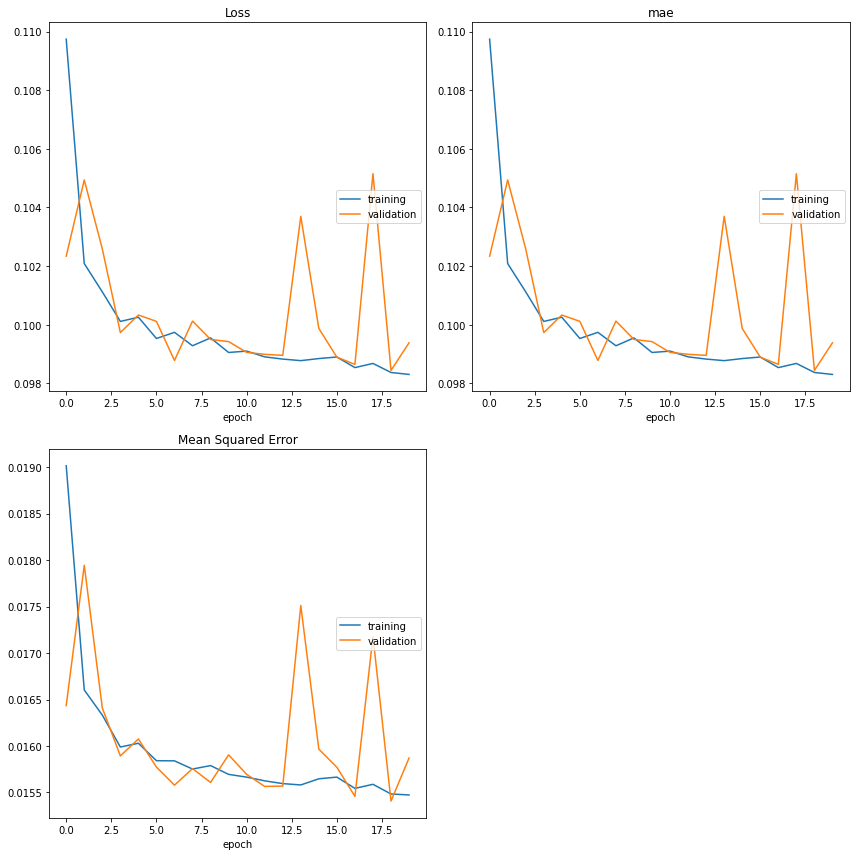

Loss
	training         	 (min:    0.098, max:    0.110, cur:    0.098)
	validation       	 (min:    0.098, max:    0.105, cur:    0.099)
mae
	training         	 (min:    0.098, max:    0.110, cur:    0.098)
	validation       	 (min:    0.098, max:    0.105, cur:    0.099)
Mean Squared Error
	training         	 (min:    0.015, max:    0.019, cur:    0.015)
	validation       	 (min:    0.015, max:    0.018, cur:    0.016)


In [55]:
best_mlp_model.fit(x_train, y_train, epochs=20,
validation_data=(x_test, y_test),
callbacks=[PlotLossesKerasTF()], verbose=1)

O fit não é o melhor, sugerindo que deveriamos aumentar a quantidade de dados de treino

* **Unscaled results**

In [58]:
#Obtain predictions

predictions = best_mlp_model.predict(x_test)

predictions = predictions.reshape(predictions.shape[0], 1)
predictions[:5]

array([[0.32983917],
       [0.5861993 ],
       [0.6111812 ],
       [0.36627102],
       [0.35603154]], dtype=float32)

In [64]:
#And now Let's unscale the model's predictions to see real prices!
predictions_unscaled = scaler_y.inverse_transform(predictions)
pd.DataFrame(predictions_unscaled)

,0
0,86.596786
1,91.723984
2,92.223625
3,87.325424
4,87.120628
...,...
19573,88.031685
19574,91.162704
19575,88.538513
19576,88.702621


In [66]:
y_test_unscaled = pd.DataFrame(scaler_y.inverse_transform(y_test))
y_test_unscaled

,0
0,87.0
1,90.0
2,84.0
3,86.0
4,90.0
...,...
19573,82.0
19574,88.0
19575,85.0
19576,90.0


In [67]:
print('MAE:', metrics.mean_absolute_error(y_test_unscaled, predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled, predictions_unscaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_unscaled)))

MAE: 1.9877052338304293
MSE: 6.3484715905634665
RMSE: 2.519617350028267


#### **5.4. Support Vector Machine**

Separar o data-set em conjuntos de treino e teste <br>
Tamanho de teste - 25% <br>
Seed = 2022

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2022)

Importar funções necessárias para este modelo

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Criação de uma instância SVC()

In [ ]:
model = SVC(random_state=2022)
model.fit(x_train,y_train)

Geração de previsões

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_test

**Avaliação do modelo**

Importar funções necessárias

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

Matriz de confusão

In [ ]:
plot_confusion_matrix(model, x_test, y_test) 

Classification report

In [ ]:
print(classification_report(y_test, y_pred))

TODO: 
- usar GRIDSEARCH e PRUNNIG?
- Redes neuronais

In [ ]:
!pip install --upgrade tensorflow-gpu==2.4.1

In [5]:
import tensorflow as tf
tf.test.is_gpu_available()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]